# 0. Extract dataset

In [ ]:
import tarfile

# Path to your .tar.gz file
tar_gz_path = '/notebooks/Tipu-12.tar.xz'

# Path to the directory where you want to extract the contents
extract_path = '/notebooks/extract'

# Open the tar.gz file
with tarfile.open(tar_gz_path, 'r:xz') as tar:
    # Extract all contents
    tar.extractall(path=extract_path)

print(f"Extracted all files to {extract_path}")

Extracted all files to /notebooks/extract


# 1. Train Model

In [2]:
import timm
import torch.nn as nn
import torch.optim as optim

from timm.data.dataset import ImageDataset
from timm.data.loader import create_loader
from torchvision.transforms import v2
import torch
import numpy as np

from tqdm import tqdm

In [3]:
IMG_SIZE = 224
IMG_CHANNELS = 3
BATCH_SIZE = 32
nb_classes = 12
num_epochs = 200

In [4]:
normalize = v2.Compose([
    v2.Resize((IMG_SIZE, IMG_SIZE), interpolation=v2.InterpolationMode.BICUBIC),
    v2.ToDtype(torch.float32),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dir = "/Path/to/train/dataset"
val_dir = "/Path/to/val/dataset"
test_dir = "/Path/to/test/dataset"

train_dataset = ImageDataset(train_dir, class_map="/Path/to/class_to_order.txt", transform=normalize)
val_dataset = ImageDataset(val_dir, class_map="/Path/to/class_to_order.txt", transform=normalize)

train_loader = create_loader(train_dataset, (IMG_CHANNELS, IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, is_training=True, num_workers=8)
val_loader = create_loader(val_dataset, (IMG_CHANNELS, IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, is_training=False, num_workers=8)

# Load pretrained model
model = timm.create_model("resnet50.a1_in1k", pretrained=True, num_classes=nb_classes)
model = nn.Sequential(model, nn.Softmax(dim=1))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

## 1.1 Train and validate

Epoch 1/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 1/200, Loss: 2.2554, Training Accuracy: 0.3615
Model saved to /notebooks/weights2/model_epoch_1.pth


Validation Epoch 1/200: 100%|██████████| 51/51 [00:02<00:00, 20.88batch/s]


Validation Loss: 2.1143, Validation Accuracy: 0.5053


Epoch 2/200: 100%|██████████| 352/352 [00:44<00:00,  7.96batch/s]


Epoch 2/200, Loss: 2.1536, Training Accuracy: 0.4588
Model saved to /notebooks/weights2/model_epoch_2.pth


Validation Epoch 2/200: 100%|██████████| 51/51 [00:02<00:00, 23.34batch/s]


Validation Loss: 2.0837, Validation Accuracy: 0.5337


Epoch 3/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 3/200, Loss: 2.1239, Training Accuracy: 0.4900
Model saved to /notebooks/weights2/model_epoch_3.pth


Validation Epoch 3/200: 100%|██████████| 51/51 [00:02<00:00, 23.57batch/s]


Validation Loss: 2.0535, Validation Accuracy: 0.5608


Epoch 4/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 4/200, Loss: 2.0980, Training Accuracy: 0.5162
Model saved to /notebooks/weights2/model_epoch_4.pth


Validation Epoch 4/200: 100%|██████████| 51/51 [00:02<00:00, 23.04batch/s]


Validation Loss: 2.0069, Validation Accuracy: 0.6084


Epoch 5/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 5/200, Loss: 2.0812, Training Accuracy: 0.5318
Model saved to /notebooks/weights2/model_epoch_5.pth


Validation Epoch 5/200: 100%|██████████| 51/51 [00:02<00:00, 23.53batch/s]


Validation Loss: 2.0036, Validation Accuracy: 0.6133


Epoch 6/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 6/200, Loss: 2.0802, Training Accuracy: 0.5343
Model saved to /notebooks/weights2/model_epoch_6.pth


Validation Epoch 6/200: 100%|██████████| 51/51 [00:02<00:00, 23.06batch/s]


Validation Loss: 1.9725, Validation Accuracy: 0.6473


Epoch 7/200: 100%|██████████| 352/352 [00:44<00:00,  7.89batch/s]


Epoch 7/200, Loss: 2.0684, Training Accuracy: 0.5436
Model saved to /notebooks/weights2/model_epoch_7.pth


Validation Epoch 7/200: 100%|██████████| 51/51 [00:02<00:00, 23.11batch/s]


Validation Loss: 2.0052, Validation Accuracy: 0.6146


Epoch 8/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 8/200, Loss: 2.0624, Training Accuracy: 0.5492
Model saved to /notebooks/weights2/model_epoch_8.pth


Validation Epoch 8/200: 100%|██████████| 51/51 [00:02<00:00, 23.28batch/s]


Validation Loss: 1.9863, Validation Accuracy: 0.6343


Epoch 9/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 9/200, Loss: 2.0400, Training Accuracy: 0.5746
Model saved to /notebooks/weights2/model_epoch_9.pth


Validation Epoch 9/200: 100%|██████████| 51/51 [00:02<00:00, 22.39batch/s]


Validation Loss: 1.9604, Validation Accuracy: 0.6584


Epoch 10/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 10/200, Loss: 2.0387, Training Accuracy: 0.5749
Model saved to /notebooks/weights2/model_epoch_10.pth


Validation Epoch 10/200: 100%|██████████| 51/51 [00:02<00:00, 23.41batch/s]


Validation Loss: 1.9521, Validation Accuracy: 0.6640


Epoch 11/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 11/200, Loss: 2.0341, Training Accuracy: 0.5781
Model saved to /notebooks/weights2/model_epoch_11.pth


Validation Epoch 11/200: 100%|██████████| 51/51 [00:02<00:00, 22.93batch/s]


Validation Loss: 1.9459, Validation Accuracy: 0.6671


Epoch 12/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 12/200, Loss: 2.0173, Training Accuracy: 0.5959
Model saved to /notebooks/weights2/model_epoch_12.pth


Validation Epoch 12/200: 100%|██████████| 51/51 [00:02<00:00, 23.32batch/s]


Validation Loss: 1.9392, Validation Accuracy: 0.6794


Epoch 13/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 13/200, Loss: 2.0216, Training Accuracy: 0.5927
Model saved to /notebooks/weights2/model_epoch_13.pth


Validation Epoch 13/200: 100%|██████████| 51/51 [00:02<00:00, 23.78batch/s]


Validation Loss: 1.9384, Validation Accuracy: 0.6788


Epoch 14/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 14/200, Loss: 2.0147, Training Accuracy: 0.5972
Model saved to /notebooks/weights2/model_epoch_14.pth


Validation Epoch 14/200: 100%|██████████| 51/51 [00:02<00:00, 23.63batch/s]


Validation Loss: 1.9468, Validation Accuracy: 0.6671


Epoch 15/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 15/200, Loss: 2.0126, Training Accuracy: 0.5989
Model saved to /notebooks/weights2/model_epoch_15.pth


Validation Epoch 15/200: 100%|██████████| 51/51 [00:02<00:00, 23.47batch/s]


Validation Loss: 1.9163, Validation Accuracy: 0.7041


Epoch 16/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 16/200, Loss: 1.9989, Training Accuracy: 0.6144
Model saved to /notebooks/weights2/model_epoch_16.pth


Validation Epoch 16/200: 100%|██████████| 51/51 [00:02<00:00, 23.00batch/s]


Validation Loss: 1.9104, Validation Accuracy: 0.7078


Epoch 17/200: 100%|██████████| 352/352 [00:44<00:00,  7.96batch/s]


Epoch 17/200, Loss: 1.9922, Training Accuracy: 0.6210
Model saved to /notebooks/weights2/model_epoch_17.pth


Validation Epoch 17/200: 100%|██████████| 51/51 [00:02<00:00, 23.70batch/s]


Validation Loss: 1.9337, Validation Accuracy: 0.6788


Epoch 18/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 18/200, Loss: 1.9738, Training Accuracy: 0.6417
Model saved to /notebooks/weights2/model_epoch_18.pth


Validation Epoch 18/200: 100%|██████████| 51/51 [00:02<00:00, 23.74batch/s]


Validation Loss: 1.9299, Validation Accuracy: 0.6875


Epoch 19/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 19/200, Loss: 1.9913, Training Accuracy: 0.6224
Model saved to /notebooks/weights2/model_epoch_19.pth


Validation Epoch 19/200: 100%|██████████| 51/51 [00:02<00:00, 23.40batch/s]


Validation Loss: 1.9248, Validation Accuracy: 0.6918


Epoch 20/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 20/200, Loss: 1.9832, Training Accuracy: 0.6339
Model saved to /notebooks/weights2/model_epoch_20.pth


Validation Epoch 20/200: 100%|██████████| 51/51 [00:02<00:00, 23.15batch/s]


Validation Loss: 1.9150, Validation Accuracy: 0.7029


Epoch 21/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 21/200, Loss: 1.9718, Training Accuracy: 0.6414
Model saved to /notebooks/weights2/model_epoch_21.pth


Validation Epoch 21/200: 100%|██████████| 51/51 [00:02<00:00, 23.27batch/s]


Validation Loss: 1.9292, Validation Accuracy: 0.6868


Epoch 22/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 22/200, Loss: 1.9737, Training Accuracy: 0.6414
Model saved to /notebooks/weights2/model_epoch_22.pth


Validation Epoch 22/200: 100%|██████████| 51/51 [00:02<00:00, 23.08batch/s]


Validation Loss: 1.9343, Validation Accuracy: 0.6825


Epoch 23/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 23/200, Loss: 1.9799, Training Accuracy: 0.6343
Model saved to /notebooks/weights2/model_epoch_23.pth


Validation Epoch 23/200: 100%|██████████| 51/51 [00:02<00:00, 23.14batch/s]


Validation Loss: 1.9010, Validation Accuracy: 0.7171


Epoch 24/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 24/200, Loss: 1.9593, Training Accuracy: 0.6545
Model saved to /notebooks/weights2/model_epoch_24.pth


Validation Epoch 24/200: 100%|██████████| 51/51 [00:02<00:00, 23.69batch/s]


Validation Loss: 1.9236, Validation Accuracy: 0.6930


Epoch 25/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 25/200, Loss: 1.9501, Training Accuracy: 0.6645
Model saved to /notebooks/weights2/model_epoch_25.pth


Validation Epoch 25/200: 100%|██████████| 51/51 [00:02<00:00, 23.28batch/s]


Validation Loss: 1.8942, Validation Accuracy: 0.7245


Epoch 26/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 26/200, Loss: 1.9499, Training Accuracy: 0.6650
Model saved to /notebooks/weights2/model_epoch_26.pth


Validation Epoch 26/200: 100%|██████████| 51/51 [00:02<00:00, 23.30batch/s]


Validation Loss: 1.9144, Validation Accuracy: 0.7017


Epoch 27/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 27/200, Loss: 1.9437, Training Accuracy: 0.6702
Model saved to /notebooks/weights2/model_epoch_27.pth


Validation Epoch 27/200: 100%|██████████| 51/51 [00:02<00:00, 23.16batch/s]


Validation Loss: 1.8899, Validation Accuracy: 0.7288


Epoch 28/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 28/200, Loss: 1.9410, Training Accuracy: 0.6744
Model saved to /notebooks/weights2/model_epoch_28.pth


Validation Epoch 28/200: 100%|██████████| 51/51 [00:02<00:00, 23.06batch/s]


Validation Loss: 1.8813, Validation Accuracy: 0.7363


Epoch 29/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 29/200, Loss: 1.9352, Training Accuracy: 0.6792
Model saved to /notebooks/weights2/model_epoch_29.pth


Validation Epoch 29/200: 100%|██████████| 51/51 [00:02<00:00, 23.64batch/s]


Validation Loss: 1.8806, Validation Accuracy: 0.7387


Epoch 30/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 30/200, Loss: 1.9299, Training Accuracy: 0.6847
Model saved to /notebooks/weights2/model_epoch_30.pth


Validation Epoch 30/200: 100%|██████████| 51/51 [00:02<00:00, 23.24batch/s]


Validation Loss: 1.8890, Validation Accuracy: 0.7301


Epoch 31/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 31/200, Loss: 1.9410, Training Accuracy: 0.6722
Model saved to /notebooks/weights2/model_epoch_31.pth


Validation Epoch 31/200: 100%|██████████| 51/51 [00:02<00:00, 23.56batch/s]


Validation Loss: 1.8860, Validation Accuracy: 0.7332


Epoch 32/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 32/200, Loss: 1.9300, Training Accuracy: 0.6843
Model saved to /notebooks/weights2/model_epoch_32.pth


Validation Epoch 32/200: 100%|██████████| 51/51 [00:02<00:00, 23.16batch/s]


Validation Loss: 1.8869, Validation Accuracy: 0.7307


Epoch 33/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 33/200, Loss: 1.9317, Training Accuracy: 0.6827
Model saved to /notebooks/weights2/model_epoch_33.pth


Validation Epoch 33/200: 100%|██████████| 51/51 [00:02<00:00, 23.21batch/s]


Validation Loss: 1.9104, Validation Accuracy: 0.7116


Epoch 34/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 34/200, Loss: 1.9278, Training Accuracy: 0.6867
Model saved to /notebooks/weights2/model_epoch_34.pth


Validation Epoch 34/200: 100%|██████████| 51/51 [00:02<00:00, 22.72batch/s]


Validation Loss: 1.8702, Validation Accuracy: 0.7511


Epoch 35/200: 100%|██████████| 352/352 [00:44<00:00,  7.90batch/s]


Epoch 35/200, Loss: 1.9292, Training Accuracy: 0.6859
Model saved to /notebooks/weights2/model_epoch_35.pth


Validation Epoch 35/200: 100%|██████████| 51/51 [00:02<00:00, 23.19batch/s]


Validation Loss: 1.8908, Validation Accuracy: 0.7239


Epoch 36/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 36/200, Loss: 1.9213, Training Accuracy: 0.6934
Model saved to /notebooks/weights2/model_epoch_36.pth


Validation Epoch 36/200: 100%|██████████| 51/51 [00:02<00:00, 22.57batch/s]


Validation Loss: 1.8886, Validation Accuracy: 0.7319


Epoch 37/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 37/200, Loss: 1.9243, Training Accuracy: 0.6903
Model saved to /notebooks/weights2/model_epoch_37.pth


Validation Epoch 37/200: 100%|██████████| 51/51 [00:02<00:00, 23.30batch/s]


Validation Loss: 1.8763, Validation Accuracy: 0.7375


Epoch 38/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 38/200, Loss: 1.9158, Training Accuracy: 0.6991
Model saved to /notebooks/weights2/model_epoch_38.pth


Validation Epoch 38/200: 100%|██████████| 51/51 [00:02<00:00, 22.81batch/s]


Validation Loss: 1.8875, Validation Accuracy: 0.7326


Epoch 39/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 39/200, Loss: 1.9160, Training Accuracy: 0.6977
Model saved to /notebooks/weights2/model_epoch_39.pth


Validation Epoch 39/200: 100%|██████████| 51/51 [00:02<00:00, 23.61batch/s]


Validation Loss: 1.8719, Validation Accuracy: 0.7474


Epoch 40/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 40/200, Loss: 1.9104, Training Accuracy: 0.7045
Model saved to /notebooks/weights2/model_epoch_40.pth


Validation Epoch 40/200: 100%|██████████| 51/51 [00:02<00:00, 23.10batch/s]


Validation Loss: 1.8782, Validation Accuracy: 0.7418


Epoch 41/200: 100%|██████████| 352/352 [00:44<00:00,  7.89batch/s]


Epoch 41/200, Loss: 1.9139, Training Accuracy: 0.7012
Model saved to /notebooks/weights2/model_epoch_41.pth


Validation Epoch 41/200: 100%|██████████| 51/51 [00:02<00:00, 23.38batch/s]


Validation Loss: 1.8893, Validation Accuracy: 0.7276


Epoch 42/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 42/200, Loss: 1.9099, Training Accuracy: 0.7047
Model saved to /notebooks/weights2/model_epoch_42.pth


Validation Epoch 42/200: 100%|██████████| 51/51 [00:02<00:00, 22.76batch/s]


Validation Loss: 1.8736, Validation Accuracy: 0.7474


Epoch 43/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 43/200, Loss: 1.9090, Training Accuracy: 0.7056
Model saved to /notebooks/weights2/model_epoch_43.pth


Validation Epoch 43/200: 100%|██████████| 51/51 [00:02<00:00, 23.77batch/s]


Validation Loss: 1.8727, Validation Accuracy: 0.7455


Epoch 44/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 44/200, Loss: 1.9061, Training Accuracy: 0.7077
Model saved to /notebooks/weights2/model_epoch_44.pth


Validation Epoch 44/200: 100%|██████████| 51/51 [00:02<00:00, 23.81batch/s]


Validation Loss: 1.8734, Validation Accuracy: 0.7461


Epoch 45/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 45/200, Loss: 1.8961, Training Accuracy: 0.7195
Model saved to /notebooks/weights2/model_epoch_45.pth


Validation Epoch 45/200: 100%|██████████| 51/51 [00:02<00:00, 23.49batch/s]


Validation Loss: 1.8664, Validation Accuracy: 0.7492


Epoch 46/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 46/200, Loss: 1.8987, Training Accuracy: 0.7164
Model saved to /notebooks/weights2/model_epoch_46.pth


Validation Epoch 46/200: 100%|██████████| 51/51 [00:02<00:00, 23.50batch/s]


Validation Loss: 1.8587, Validation Accuracy: 0.7591


Epoch 47/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 47/200, Loss: 1.8960, Training Accuracy: 0.7177
Model saved to /notebooks/weights2/model_epoch_47.pth


Validation Epoch 47/200: 100%|██████████| 51/51 [00:02<00:00, 23.68batch/s]


Validation Loss: 1.8691, Validation Accuracy: 0.7480


Epoch 48/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 48/200, Loss: 1.8890, Training Accuracy: 0.7262
Model saved to /notebooks/weights2/model_epoch_48.pth


Validation Epoch 48/200: 100%|██████████| 51/51 [00:02<00:00, 23.77batch/s]


Validation Loss: 1.8548, Validation Accuracy: 0.7647


Epoch 49/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 49/200, Loss: 1.8901, Training Accuracy: 0.7249
Model saved to /notebooks/weights2/model_epoch_49.pth


Validation Epoch 49/200: 100%|██████████| 51/51 [00:02<00:00, 22.97batch/s]


Validation Loss: 1.8662, Validation Accuracy: 0.7529


Epoch 50/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 50/200, Loss: 1.8842, Training Accuracy: 0.7309
Model saved to /notebooks/weights2/model_epoch_50.pth


Validation Epoch 50/200: 100%|██████████| 51/51 [00:02<00:00, 22.66batch/s]


Validation Loss: 1.8572, Validation Accuracy: 0.7628


Epoch 51/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 51/200, Loss: 1.8839, Training Accuracy: 0.7298
Model saved to /notebooks/weights2/model_epoch_51.pth


Validation Epoch 51/200: 100%|██████████| 51/51 [00:02<00:00, 23.64batch/s]


Validation Loss: 1.8708, Validation Accuracy: 0.7449


Epoch 52/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 52/200, Loss: 1.8851, Training Accuracy: 0.7312
Model saved to /notebooks/weights2/model_epoch_52.pth


Validation Epoch 52/200: 100%|██████████| 51/51 [00:02<00:00, 23.65batch/s]


Validation Loss: 1.8715, Validation Accuracy: 0.7424


Epoch 53/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 53/200, Loss: 1.8845, Training Accuracy: 0.7307
Model saved to /notebooks/weights2/model_epoch_53.pth


Validation Epoch 53/200: 100%|██████████| 51/51 [00:02<00:00, 24.01batch/s]


Validation Loss: 1.8560, Validation Accuracy: 0.7610


Epoch 54/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 54/200, Loss: 1.8814, Training Accuracy: 0.7330
Model saved to /notebooks/weights2/model_epoch_54.pth


Validation Epoch 54/200: 100%|██████████| 51/51 [00:02<00:00, 23.32batch/s]


Validation Loss: 1.8578, Validation Accuracy: 0.7585


Epoch 55/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 55/200, Loss: 1.8787, Training Accuracy: 0.7359
Model saved to /notebooks/weights2/model_epoch_55.pth


Validation Epoch 55/200: 100%|██████████| 51/51 [00:02<00:00, 23.65batch/s]


Validation Loss: 1.8590, Validation Accuracy: 0.7610


Epoch 56/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 56/200, Loss: 1.8808, Training Accuracy: 0.7330
Model saved to /notebooks/weights2/model_epoch_56.pth


Validation Epoch 56/200: 100%|██████████| 51/51 [00:02<00:00, 23.65batch/s]


Validation Loss: 1.8633, Validation Accuracy: 0.7505


Epoch 57/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 57/200, Loss: 1.8721, Training Accuracy: 0.7429
Model saved to /notebooks/weights2/model_epoch_57.pth


Validation Epoch 57/200: 100%|██████████| 51/51 [00:02<00:00, 23.48batch/s]


Validation Loss: 1.8767, Validation Accuracy: 0.7369


Epoch 58/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 58/200, Loss: 1.8770, Training Accuracy: 0.7369
Model saved to /notebooks/weights2/model_epoch_58.pth


Validation Epoch 58/200: 100%|██████████| 51/51 [00:02<00:00, 23.09batch/s]


Validation Loss: 1.8545, Validation Accuracy: 0.7641


Epoch 59/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 59/200, Loss: 1.8810, Training Accuracy: 0.7346
Model saved to /notebooks/weights2/model_epoch_59.pth


Validation Epoch 59/200: 100%|██████████| 51/51 [00:02<00:00, 23.36batch/s]


Validation Loss: 1.8410, Validation Accuracy: 0.7770


Epoch 60/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 60/200, Loss: 1.8766, Training Accuracy: 0.7393
Model saved to /notebooks/weights2/model_epoch_60.pth


Validation Epoch 60/200: 100%|██████████| 51/51 [00:02<00:00, 23.57batch/s]


Validation Loss: 1.8674, Validation Accuracy: 0.7468


Epoch 61/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 61/200, Loss: 1.8676, Training Accuracy: 0.7475
Model saved to /notebooks/weights2/model_epoch_61.pth


Validation Epoch 61/200: 100%|██████████| 51/51 [00:02<00:00, 23.39batch/s]


Validation Loss: 1.8462, Validation Accuracy: 0.7758


Epoch 62/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 62/200, Loss: 1.8626, Training Accuracy: 0.7518
Model saved to /notebooks/weights2/model_epoch_62.pth


Validation Epoch 62/200: 100%|██████████| 51/51 [00:02<00:00, 23.72batch/s]


Validation Loss: 1.8510, Validation Accuracy: 0.7671


Epoch 63/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 63/200, Loss: 1.8681, Training Accuracy: 0.7480
Model saved to /notebooks/weights2/model_epoch_63.pth


Validation Epoch 63/200: 100%|██████████| 51/51 [00:02<00:00, 23.22batch/s]


Validation Loss: 1.8440, Validation Accuracy: 0.7733


Epoch 64/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 64/200, Loss: 1.8582, Training Accuracy: 0.7582
Model saved to /notebooks/weights2/model_epoch_64.pth


Validation Epoch 64/200: 100%|██████████| 51/51 [00:02<00:00, 23.00batch/s]


Validation Loss: 1.8645, Validation Accuracy: 0.7536


Epoch 65/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 65/200, Loss: 1.8670, Training Accuracy: 0.7488
Model saved to /notebooks/weights2/model_epoch_65.pth


Validation Epoch 65/200: 100%|██████████| 51/51 [00:02<00:00, 23.74batch/s]


Validation Loss: 1.8566, Validation Accuracy: 0.7634


Epoch 66/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 66/200, Loss: 1.8557, Training Accuracy: 0.7594
Model saved to /notebooks/weights2/model_epoch_66.pth


Validation Epoch 66/200: 100%|██████████| 51/51 [00:02<00:00, 23.13batch/s]


Validation Loss: 1.8471, Validation Accuracy: 0.7733


Epoch 67/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 67/200, Loss: 1.8590, Training Accuracy: 0.7572
Model saved to /notebooks/weights2/model_epoch_67.pth


Validation Epoch 67/200: 100%|██████████| 51/51 [00:02<00:00, 23.13batch/s]


Validation Loss: 1.8561, Validation Accuracy: 0.7616


Epoch 68/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 68/200, Loss: 1.8583, Training Accuracy: 0.7570
Model saved to /notebooks/weights2/model_epoch_68.pth


Validation Epoch 68/200: 100%|██████████| 51/51 [00:02<00:00, 23.35batch/s]


Validation Loss: 1.8556, Validation Accuracy: 0.7665


Epoch 69/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 69/200, Loss: 1.8570, Training Accuracy: 0.7591
Model saved to /notebooks/weights2/model_epoch_69.pth


Validation Epoch 69/200: 100%|██████████| 51/51 [00:02<00:00, 23.75batch/s]


Validation Loss: 1.8481, Validation Accuracy: 0.7678


Epoch 70/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 70/200, Loss: 1.8530, Training Accuracy: 0.7622
Model saved to /notebooks/weights2/model_epoch_70.pth


Validation Epoch 70/200: 100%|██████████| 51/51 [00:02<00:00, 23.63batch/s]


Validation Loss: 1.8476, Validation Accuracy: 0.7678


Epoch 71/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 71/200, Loss: 1.8551, Training Accuracy: 0.7590
Model saved to /notebooks/weights2/model_epoch_71.pth


Validation Epoch 71/200: 100%|██████████| 51/51 [00:02<00:00, 23.70batch/s]


Validation Loss: 1.8415, Validation Accuracy: 0.7752


Epoch 72/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 72/200, Loss: 1.8519, Training Accuracy: 0.7634
Model saved to /notebooks/weights2/model_epoch_72.pth


Validation Epoch 72/200: 100%|██████████| 51/51 [00:02<00:00, 23.62batch/s]


Validation Loss: 1.8577, Validation Accuracy: 0.7566


Epoch 73/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 73/200, Loss: 1.8495, Training Accuracy: 0.7655
Model saved to /notebooks/weights2/model_epoch_73.pth


Validation Epoch 73/200: 100%|██████████| 51/51 [00:02<00:00, 23.32batch/s]


Validation Loss: 1.8584, Validation Accuracy: 0.7622


Epoch 74/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 74/200, Loss: 1.8542, Training Accuracy: 0.7605
Model saved to /notebooks/weights2/model_epoch_74.pth


Validation Epoch 74/200: 100%|██████████| 51/51 [00:02<00:00, 23.38batch/s]


Validation Loss: 1.8401, Validation Accuracy: 0.7752


Epoch 75/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 75/200, Loss: 1.8530, Training Accuracy: 0.7637
Model saved to /notebooks/weights2/model_epoch_75.pth


Validation Epoch 75/200: 100%|██████████| 51/51 [00:02<00:00, 23.43batch/s]


Validation Loss: 1.8620, Validation Accuracy: 0.7560


Epoch 76/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 76/200, Loss: 1.8487, Training Accuracy: 0.7654
Model saved to /notebooks/weights2/model_epoch_76.pth


Validation Epoch 76/200: 100%|██████████| 51/51 [00:02<00:00, 23.12batch/s]


Validation Loss: 1.8445, Validation Accuracy: 0.7764


Epoch 77/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 77/200, Loss: 1.8420, Training Accuracy: 0.7742
Model saved to /notebooks/weights2/model_epoch_77.pth


Validation Epoch 77/200: 100%|██████████| 51/51 [00:02<00:00, 23.26batch/s]


Validation Loss: 1.8364, Validation Accuracy: 0.7826


Epoch 78/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 78/200, Loss: 1.8467, Training Accuracy: 0.7682
Model saved to /notebooks/weights2/model_epoch_78.pth


Validation Epoch 78/200: 100%|██████████| 51/51 [00:02<00:00, 23.67batch/s]


Validation Loss: 1.8451, Validation Accuracy: 0.7708


Epoch 79/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 79/200, Loss: 1.8426, Training Accuracy: 0.7732
Model saved to /notebooks/weights2/model_epoch_79.pth


Validation Epoch 79/200: 100%|██████████| 51/51 [00:02<00:00, 23.64batch/s]


Validation Loss: 1.8545, Validation Accuracy: 0.7597


Epoch 80/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 80/200, Loss: 1.8429, Training Accuracy: 0.7729
Model saved to /notebooks/weights2/model_epoch_80.pth


Validation Epoch 80/200: 100%|██████████| 51/51 [00:02<00:00, 23.19batch/s]


Validation Loss: 1.8491, Validation Accuracy: 0.7678


Epoch 81/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 81/200, Loss: 1.8393, Training Accuracy: 0.7756
Model saved to /notebooks/weights2/model_epoch_81.pth


Validation Epoch 81/200: 100%|██████████| 51/51 [00:02<00:00, 23.61batch/s]


Validation Loss: 1.8452, Validation Accuracy: 0.7715


Epoch 82/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 82/200, Loss: 1.8391, Training Accuracy: 0.7770
Model saved to /notebooks/weights2/model_epoch_82.pth


Validation Epoch 82/200: 100%|██████████| 51/51 [00:02<00:00, 23.74batch/s]


Validation Loss: 1.8411, Validation Accuracy: 0.7764


Epoch 83/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 83/200, Loss: 1.8398, Training Accuracy: 0.7745
Model saved to /notebooks/weights2/model_epoch_83.pth


Validation Epoch 83/200: 100%|██████████| 51/51 [00:02<00:00, 23.65batch/s]


Validation Loss: 1.8475, Validation Accuracy: 0.7733


Epoch 84/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 84/200, Loss: 1.8335, Training Accuracy: 0.7812
Model saved to /notebooks/weights2/model_epoch_84.pth


Validation Epoch 84/200: 100%|██████████| 51/51 [00:02<00:00, 23.59batch/s]


Validation Loss: 1.8285, Validation Accuracy: 0.7888


Epoch 85/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 85/200, Loss: 1.8265, Training Accuracy: 0.7892
Model saved to /notebooks/weights2/model_epoch_85.pth


Validation Epoch 85/200: 100%|██████████| 51/51 [00:02<00:00, 23.22batch/s]


Validation Loss: 1.8313, Validation Accuracy: 0.7888


Epoch 86/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 86/200, Loss: 1.8326, Training Accuracy: 0.7844
Model saved to /notebooks/weights2/model_epoch_86.pth


Validation Epoch 86/200: 100%|██████████| 51/51 [00:02<00:00, 23.38batch/s]


Validation Loss: 1.8327, Validation Accuracy: 0.7832


Epoch 87/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 87/200, Loss: 1.8390, Training Accuracy: 0.7763
Model saved to /notebooks/weights2/model_epoch_87.pth


Validation Epoch 87/200: 100%|██████████| 51/51 [00:02<00:00, 22.70batch/s]


Validation Loss: 1.8260, Validation Accuracy: 0.7931


Epoch 88/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 88/200, Loss: 1.8287, Training Accuracy: 0.7855
Model saved to /notebooks/weights2/model_epoch_88.pth


Validation Epoch 88/200: 100%|██████████| 51/51 [00:02<00:00, 23.38batch/s]


Validation Loss: 1.8322, Validation Accuracy: 0.7894


Epoch 89/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 89/200, Loss: 1.8297, Training Accuracy: 0.7853
Model saved to /notebooks/weights2/model_epoch_89.pth


Validation Epoch 89/200: 100%|██████████| 51/51 [00:02<00:00, 23.17batch/s]


Validation Loss: 1.8367, Validation Accuracy: 0.7813


Epoch 90/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 90/200, Loss: 1.8303, Training Accuracy: 0.7849
Model saved to /notebooks/weights2/model_epoch_90.pth


Validation Epoch 90/200: 100%|██████████| 51/51 [00:02<00:00, 23.40batch/s]


Validation Loss: 1.8377, Validation Accuracy: 0.7838


Epoch 91/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 91/200, Loss: 1.8360, Training Accuracy: 0.7808
Model saved to /notebooks/weights2/model_epoch_91.pth


Validation Epoch 91/200: 100%|██████████| 51/51 [00:02<00:00, 23.27batch/s]


Validation Loss: 1.8495, Validation Accuracy: 0.7684


Epoch 92/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 92/200, Loss: 1.8315, Training Accuracy: 0.7840
Model saved to /notebooks/weights2/model_epoch_92.pth


Validation Epoch 92/200: 100%|██████████| 51/51 [00:02<00:00, 23.63batch/s]


Validation Loss: 1.8348, Validation Accuracy: 0.7832


Epoch 93/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 93/200, Loss: 1.8236, Training Accuracy: 0.7935
Model saved to /notebooks/weights2/model_epoch_93.pth


Validation Epoch 93/200: 100%|██████████| 51/51 [00:02<00:00, 23.02batch/s]


Validation Loss: 1.8361, Validation Accuracy: 0.7826


Epoch 94/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 94/200, Loss: 1.8273, Training Accuracy: 0.7868
Model saved to /notebooks/weights2/model_epoch_94.pth


Validation Epoch 94/200: 100%|██████████| 51/51 [00:02<00:00, 23.37batch/s]


Validation Loss: 1.8419, Validation Accuracy: 0.7764


Epoch 95/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 95/200, Loss: 1.8260, Training Accuracy: 0.7905
Model saved to /notebooks/weights2/model_epoch_95.pth


Validation Epoch 95/200: 100%|██████████| 51/51 [00:02<00:00, 23.16batch/s]


Validation Loss: 1.8300, Validation Accuracy: 0.7900


Epoch 96/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 96/200, Loss: 1.8219, Training Accuracy: 0.7938
Model saved to /notebooks/weights2/model_epoch_96.pth


Validation Epoch 96/200: 100%|██████████| 51/51 [00:02<00:00, 23.37batch/s]


Validation Loss: 1.8394, Validation Accuracy: 0.7789


Epoch 97/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 97/200, Loss: 1.8244, Training Accuracy: 0.7908
Model saved to /notebooks/weights2/model_epoch_97.pth


Validation Epoch 97/200: 100%|██████████| 51/51 [00:02<00:00, 23.38batch/s]


Validation Loss: 1.8180, Validation Accuracy: 0.7999


Epoch 98/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 98/200, Loss: 1.8140, Training Accuracy: 0.8026
Model saved to /notebooks/weights2/model_epoch_98.pth


Validation Epoch 98/200: 100%|██████████| 51/51 [00:02<00:00, 23.71batch/s]


Validation Loss: 1.8388, Validation Accuracy: 0.7826


Epoch 99/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 99/200, Loss: 1.8183, Training Accuracy: 0.7974
Model saved to /notebooks/weights2/model_epoch_99.pth


Validation Epoch 99/200: 100%|██████████| 51/51 [00:02<00:00, 23.38batch/s]


Validation Loss: 1.8368, Validation Accuracy: 0.7801


Epoch 100/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 100/200, Loss: 1.8208, Training Accuracy: 0.7939
Model saved to /notebooks/weights2/model_epoch_100.pth


Validation Epoch 100/200: 100%|██████████| 51/51 [00:02<00:00, 23.75batch/s]


Validation Loss: 1.8289, Validation Accuracy: 0.7900


Epoch 101/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 101/200, Loss: 1.8230, Training Accuracy: 0.7924
Model saved to /notebooks/weights2/model_epoch_101.pth


Validation Epoch 101/200: 100%|██████████| 51/51 [00:02<00:00, 22.86batch/s]


Validation Loss: 1.8394, Validation Accuracy: 0.7807


Epoch 102/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 102/200, Loss: 1.8222, Training Accuracy: 0.7940
Model saved to /notebooks/weights2/model_epoch_102.pth


Validation Epoch 102/200: 100%|██████████| 51/51 [00:02<00:00, 23.44batch/s]


Validation Loss: 1.8364, Validation Accuracy: 0.7801


Epoch 103/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 103/200, Loss: 1.8162, Training Accuracy: 0.8003
Model saved to /notebooks/weights2/model_epoch_103.pth


Validation Epoch 103/200: 100%|██████████| 51/51 [00:02<00:00, 23.52batch/s]


Validation Loss: 1.8554, Validation Accuracy: 0.7641


Epoch 104/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 104/200, Loss: 1.8223, Training Accuracy: 0.7926
Model saved to /notebooks/weights2/model_epoch_104.pth


Validation Epoch 104/200: 100%|██████████| 51/51 [00:02<00:00, 23.59batch/s]


Validation Loss: 1.8440, Validation Accuracy: 0.7746


Epoch 105/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 105/200, Loss: 1.8129, Training Accuracy: 0.8038
Model saved to /notebooks/weights2/model_epoch_105.pth


Validation Epoch 105/200: 100%|██████████| 51/51 [00:02<00:00, 23.55batch/s]


Validation Loss: 1.8467, Validation Accuracy: 0.7708


Epoch 106/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 106/200, Loss: 1.8166, Training Accuracy: 0.7990
Model saved to /notebooks/weights2/model_epoch_106.pth


Validation Epoch 106/200: 100%|██████████| 51/51 [00:02<00:00, 23.49batch/s]


Validation Loss: 1.8273, Validation Accuracy: 0.7937


Epoch 107/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 107/200, Loss: 1.8180, Training Accuracy: 0.7963
Model saved to /notebooks/weights2/model_epoch_107.pth


Validation Epoch 107/200: 100%|██████████| 51/51 [00:02<00:00, 23.91batch/s]


Validation Loss: 1.8471, Validation Accuracy: 0.7702


Epoch 108/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 108/200, Loss: 1.8042, Training Accuracy: 0.8111
Model saved to /notebooks/weights2/model_epoch_108.pth


Validation Epoch 108/200: 100%|██████████| 51/51 [00:02<00:00, 23.51batch/s]


Validation Loss: 1.8328, Validation Accuracy: 0.7881


Epoch 109/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 109/200, Loss: 1.8038, Training Accuracy: 0.8116
Model saved to /notebooks/weights2/model_epoch_109.pth


Validation Epoch 109/200: 100%|██████████| 51/51 [00:02<00:00, 23.84batch/s]


Validation Loss: 1.8393, Validation Accuracy: 0.7783


Epoch 110/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 110/200, Loss: 1.8132, Training Accuracy: 0.8025
Model saved to /notebooks/weights2/model_epoch_110.pth


Validation Epoch 110/200: 100%|██████████| 51/51 [00:02<00:00, 23.96batch/s]


Validation Loss: 1.8352, Validation Accuracy: 0.7844


Epoch 111/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 111/200, Loss: 1.8111, Training Accuracy: 0.8055
Model saved to /notebooks/weights2/model_epoch_111.pth


Validation Epoch 111/200: 100%|██████████| 51/51 [00:02<00:00, 23.14batch/s]


Validation Loss: 1.8400, Validation Accuracy: 0.7776


Epoch 112/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 112/200, Loss: 1.8083, Training Accuracy: 0.8068
Model saved to /notebooks/weights2/model_epoch_112.pth


Validation Epoch 112/200: 100%|██████████| 51/51 [00:02<00:00, 22.78batch/s]


Validation Loss: 1.8321, Validation Accuracy: 0.7857


Epoch 113/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 113/200, Loss: 1.8065, Training Accuracy: 0.8101
Model saved to /notebooks/weights2/model_epoch_113.pth


Validation Epoch 113/200: 100%|██████████| 51/51 [00:02<00:00, 23.24batch/s]


Validation Loss: 1.8359, Validation Accuracy: 0.7801


Epoch 114/200: 100%|██████████| 352/352 [00:44<00:00,  7.90batch/s]


Epoch 114/200, Loss: 1.8093, Training Accuracy: 0.8060
Model saved to /notebooks/weights2/model_epoch_114.pth


Validation Epoch 114/200: 100%|██████████| 51/51 [00:02<00:00, 23.69batch/s]


Validation Loss: 1.8306, Validation Accuracy: 0.7888


Epoch 115/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 115/200, Loss: 1.8094, Training Accuracy: 0.8066
Model saved to /notebooks/weights2/model_epoch_115.pth


Validation Epoch 115/200: 100%|██████████| 51/51 [00:02<00:00, 23.45batch/s]


Validation Loss: 1.8305, Validation Accuracy: 0.7900


Epoch 116/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 116/200, Loss: 1.8066, Training Accuracy: 0.8086
Model saved to /notebooks/weights2/model_epoch_116.pth


Validation Epoch 116/200: 100%|██████████| 51/51 [00:02<00:00, 23.02batch/s]


Validation Loss: 1.8319, Validation Accuracy: 0.7863


Epoch 117/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 117/200, Loss: 1.8040, Training Accuracy: 0.8114
Model saved to /notebooks/weights2/model_epoch_117.pth


Validation Epoch 117/200: 100%|██████████| 51/51 [00:02<00:00, 23.26batch/s]


Validation Loss: 1.8276, Validation Accuracy: 0.7912


Epoch 118/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 118/200, Loss: 1.8079, Training Accuracy: 0.8074
Model saved to /notebooks/weights2/model_epoch_118.pth


Validation Epoch 118/200: 100%|██████████| 51/51 [00:02<00:00, 22.74batch/s]


Validation Loss: 1.8458, Validation Accuracy: 0.7746


Epoch 119/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 119/200, Loss: 1.8069, Training Accuracy: 0.8097
Model saved to /notebooks/weights2/model_epoch_119.pth


Validation Epoch 119/200: 100%|██████████| 51/51 [00:02<00:00, 23.62batch/s]


Validation Loss: 1.8290, Validation Accuracy: 0.7912


Epoch 120/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 120/200, Loss: 1.8048, Training Accuracy: 0.8115
Model saved to /notebooks/weights2/model_epoch_120.pth


Validation Epoch 120/200: 100%|██████████| 51/51 [00:02<00:00, 23.40batch/s]


Validation Loss: 1.8346, Validation Accuracy: 0.7844


Epoch 121/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 121/200, Loss: 1.8113, Training Accuracy: 0.8050
Model saved to /notebooks/weights2/model_epoch_121.pth


Validation Epoch 121/200: 100%|██████████| 51/51 [00:02<00:00, 23.15batch/s]


Validation Loss: 1.8293, Validation Accuracy: 0.7906


Epoch 122/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 122/200, Loss: 1.7983, Training Accuracy: 0.8173
Model saved to /notebooks/weights2/model_epoch_122.pth


Validation Epoch 122/200: 100%|██████████| 51/51 [00:02<00:00, 23.30batch/s]


Validation Loss: 1.8222, Validation Accuracy: 0.7980


Epoch 123/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 123/200, Loss: 1.8005, Training Accuracy: 0.8143
Model saved to /notebooks/weights2/model_epoch_123.pth


Validation Epoch 123/200: 100%|██████████| 51/51 [00:02<00:00, 23.36batch/s]


Validation Loss: 1.8316, Validation Accuracy: 0.7863


Epoch 124/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 124/200, Loss: 1.7986, Training Accuracy: 0.8171
Model saved to /notebooks/weights2/model_epoch_124.pth


Validation Epoch 124/200: 100%|██████████| 51/51 [00:02<00:00, 23.44batch/s]


Validation Loss: 1.8302, Validation Accuracy: 0.7894


Epoch 125/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 125/200, Loss: 1.8039, Training Accuracy: 0.8116
Model saved to /notebooks/weights2/model_epoch_125.pth


Validation Epoch 125/200: 100%|██████████| 51/51 [00:02<00:00, 23.74batch/s]


Validation Loss: 1.8325, Validation Accuracy: 0.7875


Epoch 126/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 126/200, Loss: 1.8039, Training Accuracy: 0.8114
Model saved to /notebooks/weights2/model_epoch_126.pth


Validation Epoch 126/200: 100%|██████████| 51/51 [00:02<00:00, 23.36batch/s]


Validation Loss: 1.8477, Validation Accuracy: 0.7702


Epoch 127/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 127/200, Loss: 1.7916, Training Accuracy: 0.8244
Model saved to /notebooks/weights2/model_epoch_127.pth


Validation Epoch 127/200: 100%|██████████| 51/51 [00:02<00:00, 23.54batch/s]


Validation Loss: 1.8350, Validation Accuracy: 0.7888


Epoch 128/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 128/200, Loss: 1.7975, Training Accuracy: 0.8171
Model saved to /notebooks/weights2/model_epoch_128.pth


Validation Epoch 128/200: 100%|██████████| 51/51 [00:02<00:00, 23.45batch/s]


Validation Loss: 1.8594, Validation Accuracy: 0.7579


Epoch 129/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 129/200, Loss: 1.8043, Training Accuracy: 0.8102
Model saved to /notebooks/weights2/model_epoch_129.pth


Validation Epoch 129/200: 100%|██████████| 51/51 [00:02<00:00, 23.39batch/s]


Validation Loss: 1.8286, Validation Accuracy: 0.7912


Epoch 130/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 130/200, Loss: 1.7907, Training Accuracy: 0.8253
Model saved to /notebooks/weights2/model_epoch_130.pth


Validation Epoch 130/200: 100%|██████████| 51/51 [00:02<00:00, 23.35batch/s]


Validation Loss: 1.8249, Validation Accuracy: 0.7956


Epoch 131/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 131/200, Loss: 1.7975, Training Accuracy: 0.8174
Model saved to /notebooks/weights2/model_epoch_131.pth


Validation Epoch 131/200: 100%|██████████| 51/51 [00:02<00:00, 23.65batch/s]


Validation Loss: 1.8212, Validation Accuracy: 0.7980


Epoch 132/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 132/200, Loss: 1.7926, Training Accuracy: 0.8238
Model saved to /notebooks/weights2/model_epoch_132.pth


Validation Epoch 132/200: 100%|██████████| 51/51 [00:02<00:00, 23.37batch/s]


Validation Loss: 1.8365, Validation Accuracy: 0.7789


Epoch 133/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 133/200, Loss: 1.7920, Training Accuracy: 0.8235
Model saved to /notebooks/weights2/model_epoch_133.pth


Validation Epoch 133/200: 100%|██████████| 51/51 [00:02<00:00, 23.67batch/s]


Validation Loss: 1.8320, Validation Accuracy: 0.7851


Epoch 134/200: 100%|██████████| 352/352 [00:44<00:00,  7.89batch/s]


Epoch 134/200, Loss: 1.7888, Training Accuracy: 0.8262
Model saved to /notebooks/weights2/model_epoch_134.pth


Validation Epoch 134/200: 100%|██████████| 51/51 [00:02<00:00, 23.65batch/s]


Validation Loss: 1.8420, Validation Accuracy: 0.7746


Epoch 135/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 135/200, Loss: 1.7952, Training Accuracy: 0.8216
Model saved to /notebooks/weights2/model_epoch_135.pth


Validation Epoch 135/200: 100%|██████████| 51/51 [00:02<00:00, 23.72batch/s]


Validation Loss: 1.8264, Validation Accuracy: 0.7894


Epoch 136/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 136/200, Loss: 1.7905, Training Accuracy: 0.8254
Model saved to /notebooks/weights2/model_epoch_136.pth


Validation Epoch 136/200: 100%|██████████| 51/51 [00:02<00:00, 22.99batch/s]


Validation Loss: 1.8249, Validation Accuracy: 0.7931


Epoch 137/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 137/200, Loss: 1.7988, Training Accuracy: 0.8169
Model saved to /notebooks/weights2/model_epoch_137.pth


Validation Epoch 137/200: 100%|██████████| 51/51 [00:02<00:00, 23.02batch/s]


Validation Loss: 1.8312, Validation Accuracy: 0.7844


Epoch 138/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 138/200, Loss: 1.7916, Training Accuracy: 0.8240
Model saved to /notebooks/weights2/model_epoch_138.pth


Validation Epoch 138/200: 100%|██████████| 51/51 [00:02<00:00, 23.46batch/s]


Validation Loss: 1.8319, Validation Accuracy: 0.7863


Epoch 139/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 139/200, Loss: 1.7886, Training Accuracy: 0.8269
Model saved to /notebooks/weights2/model_epoch_139.pth


Validation Epoch 139/200: 100%|██████████| 51/51 [00:02<00:00, 22.97batch/s]


Validation Loss: 1.8173, Validation Accuracy: 0.8048


Epoch 140/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 140/200, Loss: 1.7992, Training Accuracy: 0.8167
Model saved to /notebooks/weights2/model_epoch_140.pth


Validation Epoch 140/200: 100%|██████████| 51/51 [00:02<00:00, 23.15batch/s]


Validation Loss: 1.8428, Validation Accuracy: 0.7733


Epoch 141/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 141/200, Loss: 1.7950, Training Accuracy: 0.8209
Model saved to /notebooks/weights2/model_epoch_141.pth


Validation Epoch 141/200: 100%|██████████| 51/51 [00:02<00:00, 23.51batch/s]


Validation Loss: 1.8310, Validation Accuracy: 0.7863


Epoch 142/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 142/200, Loss: 1.7948, Training Accuracy: 0.8200
Model saved to /notebooks/weights2/model_epoch_142.pth


Validation Epoch 142/200: 100%|██████████| 51/51 [00:02<00:00, 23.25batch/s]


Validation Loss: 1.8276, Validation Accuracy: 0.7869


Epoch 143/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 143/200, Loss: 1.7854, Training Accuracy: 0.8300
Model saved to /notebooks/weights2/model_epoch_143.pth


Validation Epoch 143/200: 100%|██████████| 51/51 [00:02<00:00, 23.54batch/s]


Validation Loss: 1.8277, Validation Accuracy: 0.7900


Epoch 144/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 144/200, Loss: 1.7778, Training Accuracy: 0.8382
Model saved to /notebooks/weights2/model_epoch_144.pth


Validation Epoch 144/200: 100%|██████████| 51/51 [00:02<00:00, 23.37batch/s]


Validation Loss: 1.8194, Validation Accuracy: 0.7986


Epoch 145/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 145/200, Loss: 1.7841, Training Accuracy: 0.8322
Model saved to /notebooks/weights2/model_epoch_145.pth


Validation Epoch 145/200: 100%|██████████| 51/51 [00:02<00:00, 23.73batch/s]


Validation Loss: 1.8310, Validation Accuracy: 0.7863


Epoch 146/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 146/200, Loss: 1.7813, Training Accuracy: 0.8340
Model saved to /notebooks/weights2/model_epoch_146.pth


Validation Epoch 146/200: 100%|██████████| 51/51 [00:02<00:00, 23.12batch/s]


Validation Loss: 1.8341, Validation Accuracy: 0.7844


Epoch 147/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 147/200, Loss: 1.7872, Training Accuracy: 0.8289
Model saved to /notebooks/weights2/model_epoch_147.pth


Validation Epoch 147/200: 100%|██████████| 51/51 [00:02<00:00, 23.46batch/s]


Validation Loss: 1.8352, Validation Accuracy: 0.7826


Epoch 148/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 148/200, Loss: 1.7873, Training Accuracy: 0.8278
Model saved to /notebooks/weights2/model_epoch_148.pth


Validation Epoch 148/200: 100%|██████████| 51/51 [00:02<00:00, 23.55batch/s]


Validation Loss: 1.8330, Validation Accuracy: 0.7851


Epoch 149/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 149/200, Loss: 1.7818, Training Accuracy: 0.8336
Model saved to /notebooks/weights2/model_epoch_149.pth


Validation Epoch 149/200: 100%|██████████| 51/51 [00:02<00:00, 23.44batch/s]


Validation Loss: 1.8214, Validation Accuracy: 0.7980


Epoch 150/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 150/200, Loss: 1.7883, Training Accuracy: 0.8269
Model saved to /notebooks/weights2/model_epoch_150.pth


Validation Epoch 150/200: 100%|██████████| 51/51 [00:02<00:00, 23.62batch/s]


Validation Loss: 1.8318, Validation Accuracy: 0.7851


Epoch 151/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 151/200, Loss: 1.7864, Training Accuracy: 0.8287
Model saved to /notebooks/weights2/model_epoch_151.pth


Validation Epoch 151/200: 100%|██████████| 51/51 [00:02<00:00, 23.55batch/s]


Validation Loss: 1.8266, Validation Accuracy: 0.7943


Epoch 152/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 152/200, Loss: 1.7771, Training Accuracy: 0.8383
Model saved to /notebooks/weights2/model_epoch_152.pth


Validation Epoch 152/200: 100%|██████████| 51/51 [00:02<00:00, 23.66batch/s]


Validation Loss: 1.8336, Validation Accuracy: 0.7807


Epoch 153/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 153/200, Loss: 1.7872, Training Accuracy: 0.8286
Model saved to /notebooks/weights2/model_epoch_153.pth


Validation Epoch 153/200: 100%|██████████| 51/51 [00:02<00:00, 23.05batch/s]


Validation Loss: 1.8290, Validation Accuracy: 0.7888


Epoch 154/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 154/200, Loss: 1.7797, Training Accuracy: 0.8351
Model saved to /notebooks/weights2/model_epoch_154.pth


Validation Epoch 154/200: 100%|██████████| 51/51 [00:02<00:00, 23.01batch/s]


Validation Loss: 1.8430, Validation Accuracy: 0.7770


Epoch 155/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 155/200, Loss: 1.7832, Training Accuracy: 0.8325
Model saved to /notebooks/weights2/model_epoch_155.pth


Validation Epoch 155/200: 100%|██████████| 51/51 [00:02<00:00, 23.08batch/s]


Validation Loss: 1.8545, Validation Accuracy: 0.7597


Epoch 156/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 156/200, Loss: 1.7782, Training Accuracy: 0.8371
Model saved to /notebooks/weights2/model_epoch_156.pth


Validation Epoch 156/200: 100%|██████████| 51/51 [00:02<00:00, 23.13batch/s]


Validation Loss: 1.8256, Validation Accuracy: 0.7925


Epoch 157/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 157/200, Loss: 1.7770, Training Accuracy: 0.8392
Model saved to /notebooks/weights2/model_epoch_157.pth


Validation Epoch 157/200: 100%|██████████| 51/51 [00:02<00:00, 23.24batch/s]


Validation Loss: 1.8201, Validation Accuracy: 0.7980


Epoch 158/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 158/200, Loss: 1.7760, Training Accuracy: 0.8406
Model saved to /notebooks/weights2/model_epoch_158.pth


Validation Epoch 158/200: 100%|██████████| 51/51 [00:02<00:00, 23.07batch/s]


Validation Loss: 1.8472, Validation Accuracy: 0.7696


Epoch 159/200: 100%|██████████| 352/352 [00:44<00:00,  7.90batch/s]


Epoch 159/200, Loss: 1.7853, Training Accuracy: 0.8297
Model saved to /notebooks/weights2/model_epoch_159.pth


Validation Epoch 159/200: 100%|██████████| 51/51 [00:02<00:00, 22.70batch/s]


Validation Loss: 1.8481, Validation Accuracy: 0.7708


Epoch 160/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 160/200, Loss: 1.7809, Training Accuracy: 0.8350
Model saved to /notebooks/weights2/model_epoch_160.pth


Validation Epoch 160/200: 100%|██████████| 51/51 [00:02<00:00, 23.29batch/s]


Validation Loss: 1.8334, Validation Accuracy: 0.7857


Epoch 161/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 161/200, Loss: 1.7770, Training Accuracy: 0.8399
Model saved to /notebooks/weights2/model_epoch_161.pth


Validation Epoch 161/200: 100%|██████████| 51/51 [00:02<00:00, 23.28batch/s]


Validation Loss: 1.8285, Validation Accuracy: 0.7900


Epoch 162/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 162/200, Loss: 1.7762, Training Accuracy: 0.8395
Model saved to /notebooks/weights2/model_epoch_162.pth


Validation Epoch 162/200: 100%|██████████| 51/51 [00:02<00:00, 23.21batch/s]


Validation Loss: 1.8282, Validation Accuracy: 0.7906


Epoch 163/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 163/200, Loss: 1.7775, Training Accuracy: 0.8382
Model saved to /notebooks/weights2/model_epoch_163.pth


Validation Epoch 163/200: 100%|██████████| 51/51 [00:02<00:00, 23.15batch/s]


Validation Loss: 1.8376, Validation Accuracy: 0.7820


Epoch 164/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 164/200, Loss: 1.7810, Training Accuracy: 0.8342
Model saved to /notebooks/weights2/model_epoch_164.pth


Validation Epoch 164/200: 100%|██████████| 51/51 [00:02<00:00, 23.42batch/s]


Validation Loss: 1.8318, Validation Accuracy: 0.7869


Epoch 165/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 165/200, Loss: 1.7842, Training Accuracy: 0.8306
Model saved to /notebooks/weights2/model_epoch_165.pth


Validation Epoch 165/200: 100%|██████████| 51/51 [00:02<00:00, 23.97batch/s]


Validation Loss: 1.8414, Validation Accuracy: 0.7770


Epoch 166/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 166/200, Loss: 1.7800, Training Accuracy: 0.8365
Model saved to /notebooks/weights2/model_epoch_166.pth


Validation Epoch 166/200: 100%|██████████| 51/51 [00:02<00:00, 23.23batch/s]


Validation Loss: 1.8344, Validation Accuracy: 0.7832


Epoch 167/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 167/200, Loss: 1.7799, Training Accuracy: 0.8347
Model saved to /notebooks/weights2/model_epoch_167.pth


Validation Epoch 167/200: 100%|██████████| 51/51 [00:02<00:00, 23.54batch/s]


Validation Loss: 1.8360, Validation Accuracy: 0.7832


Epoch 168/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 168/200, Loss: 1.7794, Training Accuracy: 0.8365
Model saved to /notebooks/weights2/model_epoch_168.pth


Validation Epoch 168/200: 100%|██████████| 51/51 [00:02<00:00, 23.22batch/s]


Validation Loss: 1.8330, Validation Accuracy: 0.7881


Epoch 169/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 169/200, Loss: 1.7845, Training Accuracy: 0.8314
Model saved to /notebooks/weights2/model_epoch_169.pth


Validation Epoch 169/200: 100%|██████████| 51/51 [00:02<00:00, 23.80batch/s]


Validation Loss: 1.8191, Validation Accuracy: 0.7999


Epoch 170/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 170/200, Loss: 1.7768, Training Accuracy: 0.8389
Model saved to /notebooks/weights2/model_epoch_170.pth


Validation Epoch 170/200: 100%|██████████| 51/51 [00:02<00:00, 23.08batch/s]


Validation Loss: 1.8262, Validation Accuracy: 0.7931


Epoch 171/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 171/200, Loss: 1.7735, Training Accuracy: 0.8433
Model saved to /notebooks/weights2/model_epoch_171.pth


Validation Epoch 171/200: 100%|██████████| 51/51 [00:02<00:00, 23.69batch/s]


Validation Loss: 1.8251, Validation Accuracy: 0.7925


Epoch 172/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 172/200, Loss: 1.7714, Training Accuracy: 0.8454
Model saved to /notebooks/weights2/model_epoch_172.pth


Validation Epoch 172/200: 100%|██████████| 51/51 [00:02<00:00, 23.33batch/s]


Validation Loss: 1.8293, Validation Accuracy: 0.7875


Epoch 173/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 173/200, Loss: 1.7748, Training Accuracy: 0.8403
Model saved to /notebooks/weights2/model_epoch_173.pth


Validation Epoch 173/200: 100%|██████████| 51/51 [00:02<00:00, 23.40batch/s]


Validation Loss: 1.8200, Validation Accuracy: 0.7968


Epoch 174/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 174/200, Loss: 1.7777, Training Accuracy: 0.8374
Model saved to /notebooks/weights2/model_epoch_174.pth


Validation Epoch 174/200: 100%|██████████| 51/51 [00:02<00:00, 23.76batch/s]


Validation Loss: 1.8231, Validation Accuracy: 0.7956


Epoch 175/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 175/200, Loss: 1.7748, Training Accuracy: 0.8421
Model saved to /notebooks/weights2/model_epoch_175.pth


Validation Epoch 175/200: 100%|██████████| 51/51 [00:02<00:00, 23.56batch/s]


Validation Loss: 1.8250, Validation Accuracy: 0.7931


Epoch 176/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 176/200, Loss: 1.7718, Training Accuracy: 0.8437
Model saved to /notebooks/weights2/model_epoch_176.pth


Validation Epoch 176/200: 100%|██████████| 51/51 [00:02<00:00, 23.07batch/s]


Validation Loss: 1.8141, Validation Accuracy: 0.8042


Epoch 177/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 177/200, Loss: 1.7738, Training Accuracy: 0.8428
Model saved to /notebooks/weights2/model_epoch_177.pth


Validation Epoch 177/200: 100%|██████████| 51/51 [00:02<00:00, 23.17batch/s]


Validation Loss: 1.8277, Validation Accuracy: 0.7863


Epoch 178/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 178/200, Loss: 1.7674, Training Accuracy: 0.8477
Model saved to /notebooks/weights2/model_epoch_178.pth


Validation Epoch 178/200: 100%|██████████| 51/51 [00:02<00:00, 23.64batch/s]


Validation Loss: 1.8234, Validation Accuracy: 0.7968


Epoch 179/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 179/200, Loss: 1.7694, Training Accuracy: 0.8468
Model saved to /notebooks/weights2/model_epoch_179.pth


Validation Epoch 179/200: 100%|██████████| 51/51 [00:02<00:00, 23.38batch/s]


Validation Loss: 1.8340, Validation Accuracy: 0.7857


Epoch 180/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 180/200, Loss: 1.7762, Training Accuracy: 0.8405
Model saved to /notebooks/weights2/model_epoch_180.pth


Validation Epoch 180/200: 100%|██████████| 51/51 [00:02<00:00, 23.57batch/s]


Validation Loss: 1.8366, Validation Accuracy: 0.7826


Epoch 181/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 181/200, Loss: 1.7706, Training Accuracy: 0.8442
Model saved to /notebooks/weights2/model_epoch_181.pth


Validation Epoch 181/200: 100%|██████████| 51/51 [00:02<00:00, 23.51batch/s]


Validation Loss: 1.8278, Validation Accuracy: 0.7906


Epoch 182/200: 100%|██████████| 352/352 [00:44<00:00,  7.91batch/s]


Epoch 182/200, Loss: 1.7677, Training Accuracy: 0.8485
Model saved to /notebooks/weights2/model_epoch_182.pth


Validation Epoch 182/200: 100%|██████████| 51/51 [00:02<00:00, 23.53batch/s]


Validation Loss: 1.8266, Validation Accuracy: 0.7925


Epoch 183/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 183/200, Loss: 1.7670, Training Accuracy: 0.8495
Model saved to /notebooks/weights2/model_epoch_183.pth


Validation Epoch 183/200: 100%|██████████| 51/51 [00:02<00:00, 23.40batch/s]


Validation Loss: 1.8312, Validation Accuracy: 0.7869


Epoch 184/200: 100%|██████████| 352/352 [00:44<00:00,  7.94batch/s]


Epoch 184/200, Loss: 1.7705, Training Accuracy: 0.8455
Model saved to /notebooks/weights2/model_epoch_184.pth


Validation Epoch 184/200: 100%|██████████| 51/51 [00:02<00:00, 22.46batch/s]


Validation Loss: 1.8343, Validation Accuracy: 0.7832


Epoch 185/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 185/200, Loss: 1.7641, Training Accuracy: 0.8513
Model saved to /notebooks/weights2/model_epoch_185.pth


Validation Epoch 185/200: 100%|██████████| 51/51 [00:02<00:00, 23.66batch/s]


Validation Loss: 1.8237, Validation Accuracy: 0.7980


Epoch 186/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 186/200, Loss: 1.7624, Training Accuracy: 0.8540
Model saved to /notebooks/weights2/model_epoch_186.pth


Validation Epoch 186/200: 100%|██████████| 51/51 [00:02<00:00, 22.97batch/s]


Validation Loss: 1.8354, Validation Accuracy: 0.7851


Epoch 187/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 187/200, Loss: 1.7669, Training Accuracy: 0.8488
Model saved to /notebooks/weights2/model_epoch_187.pth


Validation Epoch 187/200: 100%|██████████| 51/51 [00:02<00:00, 23.57batch/s]


Validation Loss: 1.8465, Validation Accuracy: 0.7708


Epoch 188/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 188/200, Loss: 1.7678, Training Accuracy: 0.8490
Model saved to /notebooks/weights2/model_epoch_188.pth


Validation Epoch 188/200: 100%|██████████| 51/51 [00:02<00:00, 23.50batch/s]


Validation Loss: 1.8403, Validation Accuracy: 0.7764


Epoch 189/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 189/200, Loss: 1.7691, Training Accuracy: 0.8461
Model saved to /notebooks/weights2/model_epoch_189.pth


Validation Epoch 189/200: 100%|██████████| 51/51 [00:02<00:00, 23.23batch/s]


Validation Loss: 1.8261, Validation Accuracy: 0.7925


Epoch 190/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 190/200, Loss: 1.7697, Training Accuracy: 0.8453
Model saved to /notebooks/weights2/model_epoch_190.pth


Validation Epoch 190/200: 100%|██████████| 51/51 [00:02<00:00, 23.73batch/s]


Validation Loss: 1.8233, Validation Accuracy: 0.7956


Epoch 191/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 191/200, Loss: 1.7641, Training Accuracy: 0.8519
Model saved to /notebooks/weights2/model_epoch_191.pth


Validation Epoch 191/200: 100%|██████████| 51/51 [00:02<00:00, 23.50batch/s]


Validation Loss: 1.8279, Validation Accuracy: 0.7912


Epoch 192/200: 100%|██████████| 352/352 [00:44<00:00,  7.95batch/s]


Epoch 192/200, Loss: 1.7641, Training Accuracy: 0.8514
Model saved to /notebooks/weights2/model_epoch_192.pth


Validation Epoch 192/200: 100%|██████████| 51/51 [00:02<00:00, 23.14batch/s]


Validation Loss: 1.8223, Validation Accuracy: 0.7993


Epoch 193/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 193/200, Loss: 1.7657, Training Accuracy: 0.8498
Model saved to /notebooks/weights2/model_epoch_193.pth


Validation Epoch 193/200: 100%|██████████| 51/51 [00:02<00:00, 23.66batch/s]


Validation Loss: 1.8401, Validation Accuracy: 0.7789


Epoch 194/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 194/200, Loss: 1.7639, Training Accuracy: 0.8508
Model saved to /notebooks/weights2/model_epoch_194.pth


Validation Epoch 194/200: 100%|██████████| 51/51 [00:02<00:00, 23.61batch/s]


Validation Loss: 1.8305, Validation Accuracy: 0.7888


Epoch 195/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 195/200, Loss: 1.7602, Training Accuracy: 0.8557
Model saved to /notebooks/weights2/model_epoch_195.pth


Validation Epoch 195/200: 100%|██████████| 51/51 [00:02<00:00, 23.29batch/s]


Validation Loss: 1.8279, Validation Accuracy: 0.7881


Epoch 196/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 196/200, Loss: 1.7570, Training Accuracy: 0.8596
Model saved to /notebooks/weights2/model_epoch_196.pth


Validation Epoch 196/200: 100%|██████████| 51/51 [00:02<00:00, 23.59batch/s]


Validation Loss: 1.8147, Validation Accuracy: 0.8048


Epoch 197/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 197/200, Loss: 1.7600, Training Accuracy: 0.8549
Model saved to /notebooks/weights2/model_epoch_197.pth


Validation Epoch 197/200: 100%|██████████| 51/51 [00:02<00:00, 23.42batch/s]


Validation Loss: 1.8289, Validation Accuracy: 0.7881


Epoch 198/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 198/200, Loss: 1.7592, Training Accuracy: 0.8566
Model saved to /notebooks/weights2/model_epoch_198.pth


Validation Epoch 198/200: 100%|██████████| 51/51 [00:02<00:00, 23.41batch/s]


Validation Loss: 1.8204, Validation Accuracy: 0.8011


Epoch 199/200: 100%|██████████| 352/352 [00:44<00:00,  7.92batch/s]


Epoch 199/200, Loss: 1.7585, Training Accuracy: 0.8575
Model saved to /notebooks/weights2/model_epoch_199.pth


Validation Epoch 199/200: 100%|██████████| 51/51 [00:02<00:00, 23.71batch/s]


Validation Loss: 1.8295, Validation Accuracy: 0.7906


Epoch 200/200: 100%|██████████| 352/352 [00:44<00:00,  7.93batch/s]


Epoch 200/200, Loss: 1.7662, Training Accuracy: 0.8495
Model saved to /notebooks/weights2/model_epoch_200.pth


Validation Epoch 200/200: 100%|██████████| 51/51 [00:02<00:00, 23.13batch/s]


Validation Loss: 1.8339, Validation Accuracy: 0.7857


FileNotFoundError: [Errno 2] No such file or directory: '/notebooks/plots/accuracy_per_epoch.png'

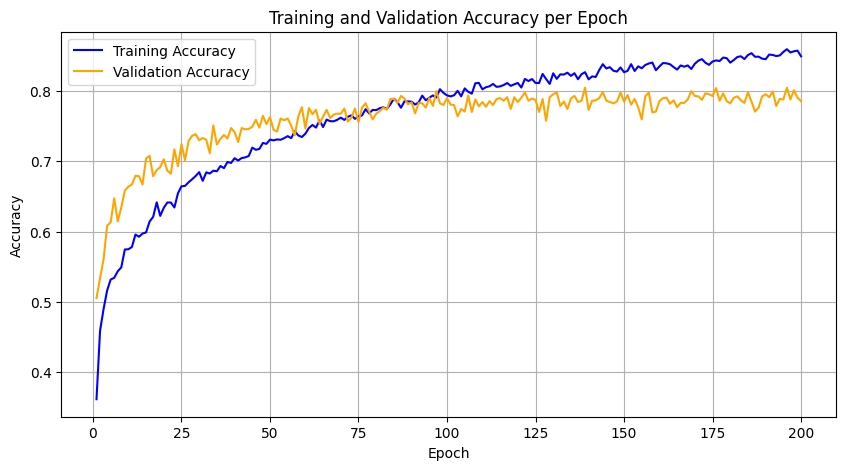

In [4]:
import matplotlib.pyplot as plt

# Initialize lists to keep track of accuracy and loss
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    corrects = 0
    total = 0

    with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}", unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            corrects += torch.sum(preds == labels.data)
            total += labels.size(0)
            pbar.update(1)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    train_acc = corrects.double() / total
    train_accuracies.append(train_acc.item())
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Training Accuracy: {train_acc:.4f}")
    
    # Save model for every epoch
    model_save_path = f"/notebooks/weights2/model_epoch_{epoch+1}.pth"
    model_save_path = f"/Path/to/save/model_epoch_{epoch+1}.pth"
    torch.save(model.state_dict(), model_save_path)
    print(f"Model saved to {model_save_path}")

    # Validation
    model.eval()
    val_loss = 0.0
    corrects = 0
    total = 0

    with tqdm(total=len(val_loader), desc=f"Validation Epoch {epoch+1}/{num_epochs}", unit='batch') as pbar:
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                corrects += torch.sum(preds == labels.data)
                total += labels.size(0)
                pbar.update(1)
    
    val_loss = val_loss / len(val_loader.dataset)
    val_acc = corrects.double() / total
    val_accuracies.append(val_acc.item())
    
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

# Plot the training accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.savefig('/notebooks/plots/accuracy_per_epoch.png')  # Save the plot
plt.show()

print('Training complete.')

## 1.2 Plot Training and Validation accuracy

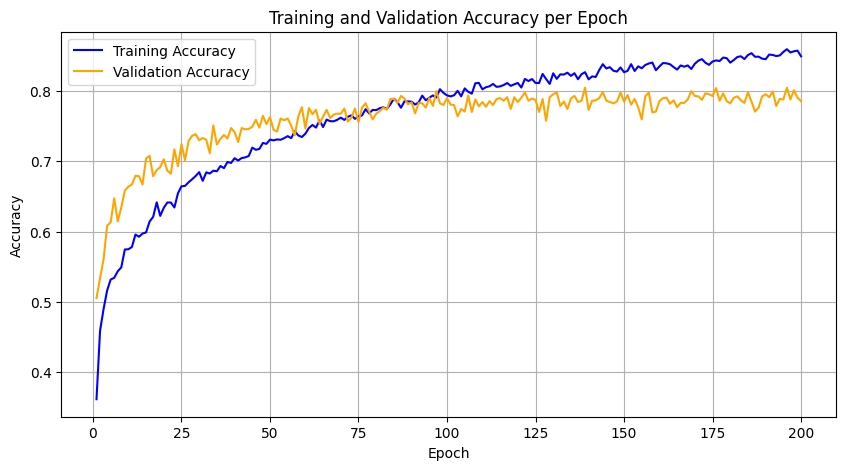

Validation Loss: 1.8339, Validation Accuracy: 0.7857


In [8]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.savefig('/Path/to/save/accuracy_per_epoch.png')
plt.show()

print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

# 2. Test model

Testing: 100%|██████████| 101/101 [00:08<00:00, 12.28batch/s]


Test Loss: 1.8216, Accuracy: 0.7986


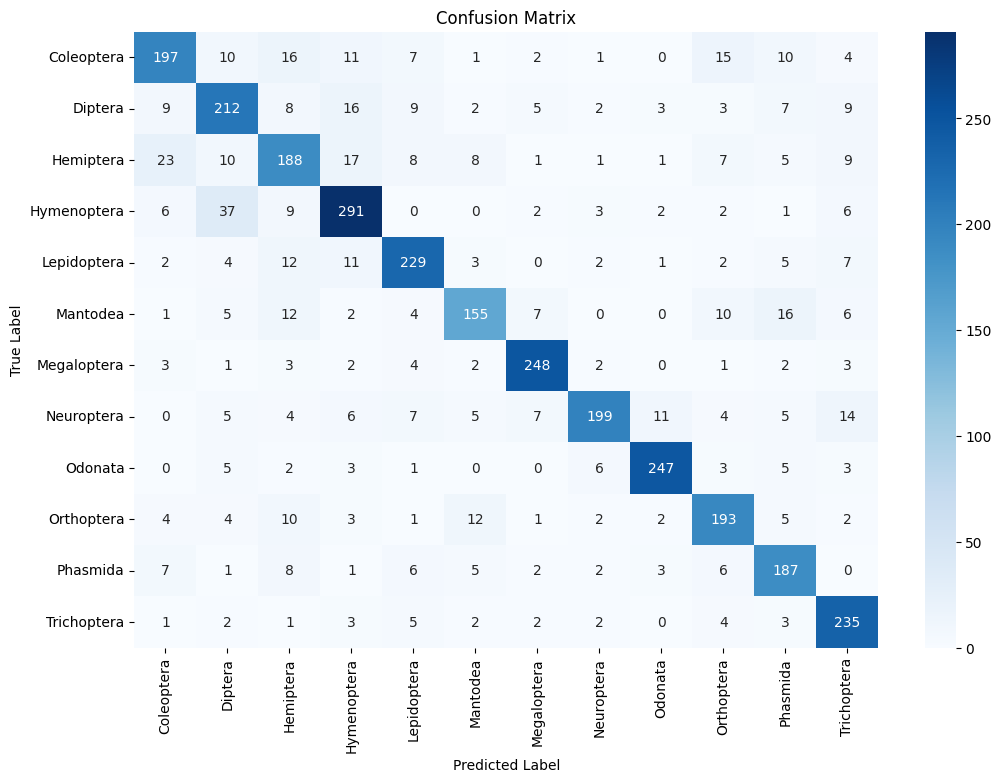

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

test_dataset = ImageDataset(test_dir, class_map="Path/to/class_to_order.txt", transform=normalize)
test_loader = create_loader(test_dataset, (IMG_CHANNELS, IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, is_training=False, num_workers=8)

model_load_path = "Path/to/load/model.pth"
model.load_state_dict(torch.load(model_load_path))
model = model.to(device)

# Test the model
model.eval()
test_loss = 0.0
corrects = 0

all_preds = []
all_labels = []

with tqdm(total=len(test_loader), desc="Testing", unit='batch') as pbar:
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            corrects += torch.sum(preds == labels.data)
            pbar.update(1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

test_loss = test_loss / len(test_loader.dataset)
test_acc = corrects.double() / len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}")

# Calculate per-class accuracy
class_correct = list(0. for i in range(nb_classes))
class_total = list(0. for i in range(nb_classes))
for label, pred in zip(all_labels, all_preds):
    if label == pred:
        class_correct[label] += 1
    class_total[label] += 1

class_accuracy = [100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(nb_classes)]

# Load class names from the class_map file
with open("Path/to/class_to_order.txt", "r") as file:
    class_names = [line.strip() for line in file.readlines()]

## 2.1 Plot Accuracy per class

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/tmp/ipykernel_40/816541718.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Accuracy')  # Ajouter une barre de couleur pour montrer l'échelle


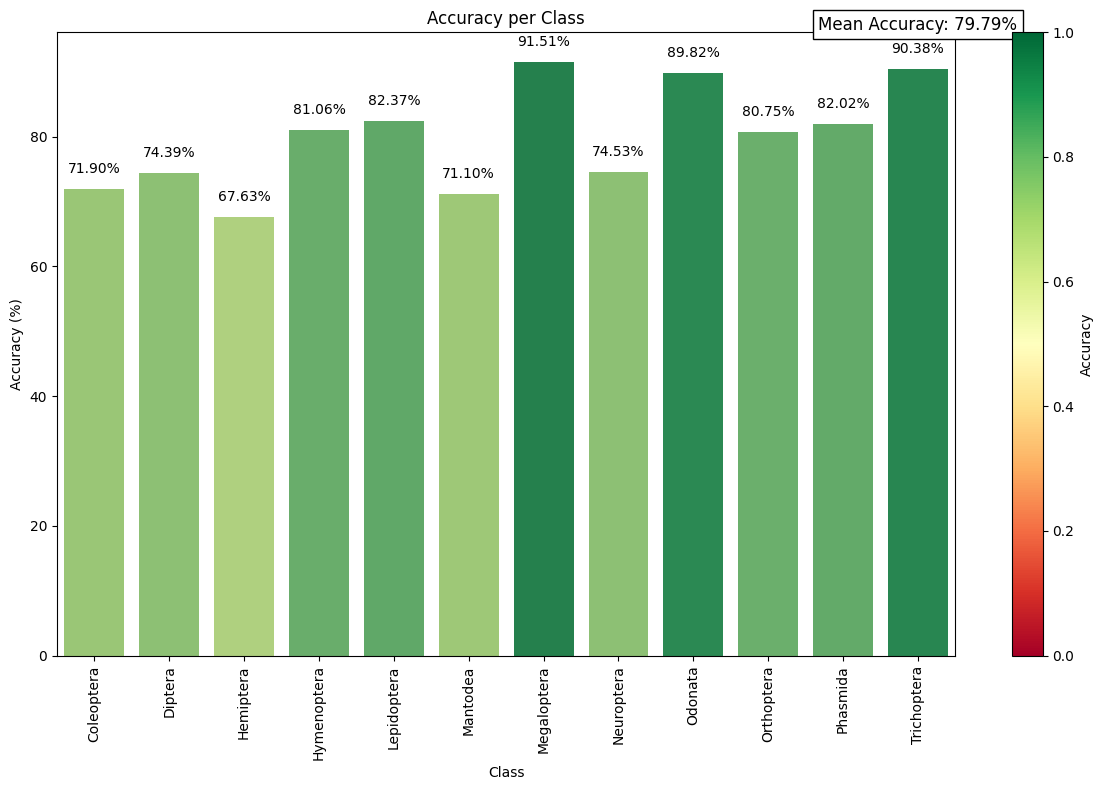

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Normalize accuracy
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])

class_accuracy_normalized = [acc / 100 for acc in class_accuracy]
avg_accuracy = np.mean(class_accuracy)

# Generate colors
colors = [sm.to_rgba(acc) for acc in class_accuracy_normalized]

# Create graph with seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=class_names, y=class_accuracy, palette=colors)
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Class')
plt.xticks(rotation=90)
plt.colorbar(sm, label='Accuracy')

for i, acc in enumerate(class_accuracy):
    ax.text(i, acc + 2, f'{acc:.2f}%', ha='center', va='bottom')

# Show mean accuracy
plt.text(len(class_names) - 1, max(class_accuracy) + 5, f'Mean Accuracy: {avg_accuracy:.2f}%', ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.savefig('Path/to/save/accuracy_per_class.png')
plt.show()

## 2.2 Plot Confusion Matrix

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Path/to/save/confusion_matrix.png')
plt.show()